# Informações Gerais

## Autores
| Nome              | Lattes                   | Email                      |
|-------------------|--------------------------|----------------------------|
| Gabriel Feitosa Melo Coelho | [Link](http://lattes.cnpq.br/4697851599945993) | gabrielcoelho09gc@gmail.com |
| Francisco Luciani de Miranda Vieira | [Link](http://lattes.cnpq.br/4627829411266800) | email_mockup@gmail.com |

## Versionamento 
- **Data de Atualização:** 15/12/2023
- **Versão do Notebook:** 1.2

## Origem dos Dados
As tabelas utilizadas nesta análise foram extraídas do Banco de Dados AGHU por meio de consultas SQL restritas ao setor de inovação do Hospital Universitário da Universidade Federal do Piauí (HU-UFPI).
Os dados são de origem primaria, provenientes de pacientes internados pelo setor de cardiologia do HU-UFPI.

**Tabelas Utilizadas:**
1. Tabela de Controle dos Pacientes
2. Tabela de Dados de Creatinina

**Período de Análise:** 2021 a 2022

## Consentimento de Uso
Esta análise foi desenvolvida como parte do projeto __________, encabeçada pela residente _______, sob orientação do prof. Dr. ______. Os dados utilizados são de propriedade do Hospital Universitário da UFPI e foram cedidos para o desenvolvimento desta análise.

# 1. Descrição da Análise

## 1.1. Introdução

O Hospital Universitário da Universidade Federal do Piauí (HU-UFPI) é um hospital público, de ensino, vinculado à Empresa Brasileira de Serviços Hospitalares (EBSERH), com atendimento de média e alta complexidade, que atende a população do estado do Piauí e estados vizinhos. Possuindo 240 leitos, sendo 30 de UTI, e 10 salas de cirurgia. O HU-UFPI é um hospital de referência e possui um setor de cardiologia que atende a pacientes internados e ambulatoriais.

Sob a otica da modernização da gestão hospitalar, o HU-UFPI fomenta soluções que possam otimizar o gerenciamento de casos e a tomada de decisão inteligente. Nesse contexto, a análise de dados hospitalares é uma ferramenta valiosa para extrair insights que podem contribuir para a melhoria da qualidade do atendimento, assistência ao paciente e otimizar o gerenciamento de casos.

É de suma importancia ressaltar a riqueza de informações que podem ser extraídas de dados hospitalares, quando os dados são consistentes, como a identificação de padrões de comportamento, a identificação de fatores de risco, a identificação de padrões de evolução de doenças, a identificação de padrões de resposta a tratamentos, entre outros.

No contexto da Cardiologia, a Insuficiência Renal Aguda (IRA) emerge como uma preocupação significativa. A IRA pode ser um desafio adicional para pacientes cardíacos, e sua prevenção torna-se fundamental para garantir uma abordagem holística no tratamento. 

Entre os fatores de risco para a IRA, a Creatinina é um indicador importante da função renal, desempenhando um papel crítico na avaliação da saúde renal dos pacientes. De forma pratica, a IRA pode ser definida como um aumento de 20% ou mais na creatinina em 24 horas ou um aumento de 50% ou mais em 48 horas.

Além disso, variáveis de controle, como Pressão Arterial Diastólica, Frequência Cardíaca, Glicemia Capilar e outras, e podem influenciar influenciar direta ou indiretamenete na ocorrência da IRA.

A presente análise avalia pacientes internados no setor de cardiologia do HU-UFPI dentro do período de 2021 a 2022, com o objetivo de identificar padrões, insights, assim como desenvolver e avaliar modelos de predição para a ocorrência de IRA.

## 1.2. Problemática

Frente ao contexto apresentado, as problemáticas que norteiam a presente análise são:

**Quais padrões podem ser identificados em pacientes internados no setor de cardiologia do HU-UFPI?**

**Qual performance de predição de modelos de Machine Learning para a ocorrência de IRA com os dados disponíveis pelo monitoramento dos pacientes internados no setor de cardiologia do HU-UFPI?**

## 1.3. Objetivos

Considerando o exposto, esta análise tem como objetivos:

- Rotular a ocorrência de IRA nos pacientes internados no setor de cardiologia do HU-UFPI.
- Realizar uma análise exploratória dos dados de controle dos pacientes e dos níveis de creatinina.
- Identificar tendências e padrões nos dados que possam indicar a ocorrência de IRA.
- Desenvolver modelos de machine learning para prever a ocorrência de Insuficiência Renal Aguda com base nas variáveis analisadas.

# 2. Preparação do Ambiente

Para conduzir a análise de dados e implementar modelos de machine learning, é essencial a configuração adequada do ambiente de trabalho virtual. Abaixo seguem as principais tecnologias e linguagem utilizada.

- **Linguagem de Programação:** Python
- **Ambiente de Desenvolvimento:** Jupyter Notebook
- **Bibliotecas Principais:** Pandas, NumPy, Matplotlib, Plotly, Scikit-learn, TensorFlow, Keras
- **Gestão de Ambiente Virtual:** Miniconda  _(opcional)_

## 2.1. Instalação de dependências

## 2.2. Importação de bibliotecas e funções

In [1101]:
from icecream import ic # Biblioteca util para debugar codigo

In [1102]:
import pandas as pd # Biblioteca para manipulacao de dados
import numpy as np # Biblioteca para manipulacao de dados

In [1103]:
import matplotlib.pyplot as plt # Biblioteca base para plotagem de graficos
import plotly.express as px # Biblioteca para plotagem de graficos
import seaborn as sns # Biblioteca para plotagem de graficos

In [1104]:
from sklearn.preprocessing import MinMaxScaler # Biblioteca para normalizacao de dados

In [1105]:
from sklearn.model_selection import train_test_split # Biblioteca para separar os dados em treino e teste
from sklearn.utils import shuffle # Biblioteca para embaralhar os dados

In [1106]:
from lazypredict.Supervised import LazyRegressor  # Biblioteca para testar varios modelos de regressao de forma rapida e pratica
from lazypredict.Supervised import LazyClassifier # Biblioteca para testar varios modelos de classificacao de forma rapida e pratica

In [1107]:
import tensorflow as tf # Biblioteca base para criacao de modelos de Deep Learning
import keras as k # Framework para criacao de modelos de Deep Learning

## 2.3. Definição de variáveis de ambiente

In [1108]:
DATA_PATH = '../data/' # <--- !! ALTERE AQUI !! caso mude o esquema de diretorios de dados
RAW_PATH = DATA_PATH + 'raw/' # <--- !! ALTERE AQUI !! caso mude o diretorio de dados brutos
PROCESSED_PATH = DATA_PATH + 'processed/' # <--- !! ALTERE AQUI !! caso mude o diretorio de dados processados
FINAL_PATH = DATA_PATH + 'final/' # <--- !! ALTERE AQUI !! caso mude o diretorio de dados finais
MODEL_PATH = '../models/' # <--- !! ALTERE AQUI !! caso mude o diretorio de modelos

In [1109]:
CONTROLE_CSV = RAW_PATH + 'controle_pacientes.csv' # <--- !! ALTERE AQUI !! caso o dataset esteja com outro nome
CREATININA_CSV = RAW_PATH + 'creatinina_pacientes.csv' # <--- !! ALTERE AQUI !! caso o dataset esteja com outro nome

## 2.4. Funções auxiliares

In [1110]:
def parse_datetime(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        df[column] = df[column].astype(str)
        df[column] = df[column].apply(lambda x: x[:19] if len(x) > 19 else x)
        df[column] = pd.to_datetime(df[column], format='%Y-%m-%d %H:%M:%S')
    return df

In [1111]:
def split_datetime(df: pd.DataFrame) -> pd.DataFrame:
    columns = [column for column in df.columns if column.startswith('dt_')]
    for column in columns:
        df[f'{column}_date'] = df[column].dt.date
    return df

In [1112]:
def uid_prontuario_dt_internacao(df: pd.DataFrame) -> pd.DataFrame:
    df['uid_prontuario_internacao'] = df.apply(lambda x: f"{x['prontuario']}_{x['dt_internacao']}", axis=1)
    return df

In [1113]:
def n_internacoes(df: pd.DataFrame) -> pd.DataFrame:
    # for each unique prontuario, for each unique dt_internacao, cumcount the number of unique uid_prontuario_internacao
    #df['n_internacoes'] = df.groupby(['prontuario', 'uid_prontuario_internacao']).cumcount() + 1
    df['n_internacoes'] = df.groupby('prontuario')['dt_internacao'].rank(method='dense').astype(int)
    return df

In [1114]:
def diff_dt_internacao_coleta_cre(df: pd.DataFrame) -> pd.DataFrame:
    df['diff_dt_internacao_coleta_cre'] = df['dt_creatinina'] - df['dt_internacao']
    return df

In [1115]:
def diff_dt_coletas_cre(df: pd.DataFrame, periods: int = 2) -> pd.DataFrame:
    for period in range(1, periods+1):
        df[f'diff_dt_coletas_cre_{period}'] = df.groupby('uid_prontuario_internacao')['dt_creatinina'].diff(periods=period)
        df[f'diff_dt_coletas_cre_{period}'] = df[f'diff_dt_coletas_cre_{period}'].fillna(pd.Timedelta(seconds=0))
    return df

In [1116]:
def n_coletas_cre(df: pd.DataFrame) -> pd.DataFrame:
    df['n_coletas_cre'] = df.groupby('uid_prontuario_internacao')['dt_creatinina'].cumcount()+1
    return df

In [1117]:
def varicao_cre(df: pd.DataFrame, periods: int = 2) -> pd.DataFrame:
    # variation of creatinine between the current and the previous collection, variation is calculated as (current - previous) / previous
    for period in range(1, periods+1):
        df[f'varicao_cre_{period}'] = (df['valor_creatinina'] - df.groupby('uid_prontuario_internacao')['valor_creatinina'].shift(period)) / df.groupby('uid_prontuario_internacao')['valor_creatinina'].shift(period)
        df[f'varicao_cre_{period}'] = df[f'varicao_cre_{period}'].fillna(0)
    return df

In [1118]:
def rotulo_ira(df: pd.DataFrame, periods: int = 2) -> pd.DataFrame:
    def validacao_24h(row):
        if row['diff_dt_coletas_cre_1'] > pd.Timedelta(hours=20) and abs(row['varicao_cre_1']) >= 0.2:
            return 1
        else:
            return 0
    def valicao_48h(row):
        if row['diff_dt_coletas_cre_2'] > pd.Timedelta(hours=40) and abs(row['varicao_cre_2']) >= 0.5:
            return 1
        else:
            return 0
    periods_rules = {
        1: validacao_24h,
        2: valicao_48h
    }
    for period in range(1, periods+1):
        df[f'rotulo_ira_{period}'] = df.apply(periods_rules[period], axis=1)
    df['ira'] = df.apply(lambda x: 1 if x['rotulo_ira_1'] == 1 or x['rotulo_ira_2'] == 1 else 0, axis=1)
    return df

In [1119]:
def futura_cre(df: pd.DataFrame) -> pd.DataFrame:
    df['futura_cre'] = df.groupby('uid_prontuario_internacao')['valor_creatinina'].shift(-1)
    df['futura_cre'] = df['futura_cre'].fillna(0)
    return df

In [1120]:
def futura_ira(df: pd.DataFrame) -> pd.DataFrame:
    df['futura_ira'] = df.groupby('uid_prontuario_internacao')['ira'].shift(-1)
    df['futura_ira'] = df['futura_ira'].fillna(0)
    df['futura_ira'] = df['futura_ira'].astype(int)
    return df

In [1121]:
def fill_coleta_contr_eliminacao(df: pd.DataFrame) -> pd.DataFrame:
    # where tipo_controle == 'Eliminação urinária' or 'Fezes' or 'Vômitos' then fill valor_controle with 1
    df.loc[df['tipo_controle'].isin(['Eliminação urinária', 'Fezes', 'Vômitos']), 'valor_controle'] = 1
    return df

In [1122]:
def diff_dt_internacao_coleta_contr(df: pd.DataFrame) -> pd.DataFrame:
    df['diff_dt_internacao_coleta_contr'] = df['dt_controle'] - df['dt_internacao']
    return df

In [1123]:
def diff_dt_coleta_contr_tipo(df: pd.DataFrame, periods: int = 2) -> pd.DataFrame:
    for period in range(1, periods+1):
        df[f'diff_dt_coleta_contr_tipo_{period}'] = df.groupby(['uid_prontuario_internacao', 'tipo_controle'])['dt_controle'].diff(periods=period)
        df[f'diff_dt_coleta_contr_tipo_{period}'] = df[f'diff_dt_coleta_contr_tipo_{period}'].fillna(pd.Timedelta(seconds=0))
    return df

In [1124]:
def variacao_contr(df: pd.DataFrame, periods: int = 2) -> pd.DataFrame:
    # variation of control between the current and the previous collection, variation is calculated as (current - previous) / previous
    for period in range(1, periods+1):
        df[f'variacao_contr_{period}'] = (df['valor_controle'] - df.groupby(['uid_prontuario_internacao', 'tipo_controle'])['valor_controle'].shift(period)) / df.groupby(['uid_prontuario_internacao', 'tipo_controle'])['valor_controle'].shift(period)
        df[f'variacao_contr_{period}'] = df[f'variacao_contr_{period}'].fillna(0)
    return df

In [1125]:
def iqr_n_coletas_cre(df: pd.DataFrame) -> pd.DataFrame:
    # calculate the interquartile range of the number of collections of creatinine
    q1, q3 = np.percentile(df['n_coletas_cre'], [25, 75])
    ic(q1, q3)
    # keep only uid_prontuario_internacao that the max n_coletas_cre is (igual or greater than q1) and (less or igual than q3)
    df_temp = df.groupby('uid_prontuario_internacao')['n_coletas_cre'].max().reset_index()
    df_temp = df_temp[(df_temp['n_coletas_cre'] >= q1) & (df_temp['n_coletas_cre'] <= q3)]
    uid_prontuario_dt_internacao_to_keep = list(df_temp['uid_prontuario_internacao'].unique())
    # keep only the uid_prontuario_internacao that are in uid_prontuario_dt_internacao_to_keep
    df = df[df['uid_prontuario_internacao'].isin(uid_prontuario_dt_internacao_to_keep)]
    df = df.reset_index(drop=True)
    # remove the row of the last n_coletas_cre for each uid_prontuario_internacao
    df = df.groupby('uid_prontuario_internacao').apply(lambda x: x.iloc[:-1])
    df = df.reset_index(drop=True)
    return df

In [1126]:
def main_tipo_contr(df: pd.DataFrame) -> pd.DataFrame:
    # where tipo_controle == 'Eliminação urinária' or 'Fezes' or 'Vômitos' then fill valor_controle with 1
    df = df.loc[df['tipo_controle'].isin(['Eliminação urinária', 'Fezes', 'Pressão Arterial Sistólica', 'Pressão Arterial Diastólica', 'Frequência Cardíaca', 'Glicemia Capilar', 'Temperatura Axilar', 'Frequência Respiratória', 'Vômitos'])]
    df = df.reset_index(drop=True)
    return df

In [1127]:
def pivot_base_final(df: pd.DataFrame) -> pd.DataFrame:
    index_columns = ['uid_prontuario_internacao', 'dt_base']
    
    # transform tipo_controle to columns valor_controle_{tipo_controle} and fill with valor_controle
    # transform diff_dt_internacao_coleta_contr to columns diff_dt_internacao_coleta_contr_{tipo_controle} and fill with diff_dt_internacao_coleta_contr
    # transform diff_dt_coleta_contr_tipo_1 to columns diff_dt_coleta_contr_tipo_1_{tipo_controle} and fill with diff_dt_coleta_contr_tipo_1
    # transform diff_dt_coleta_contr_tipo_2 to columns diff_dt_coleta_contr_tipo_2_{tipo_controle} and fill with diff_dt_coleta_contr_tipo_2
    # transform variacao_contr_1 to columns variacao_contr_1_{tipo_controle} and fill with variacao_contr_1
    # transform variacao_contr_2 to columns variacao_contr_2_{tipo_controle} and fill with variacao_contr_2

    df_pivoted = df.pivot_table(index=index_columns,
                        columns='tipo_controle',
                        values=['valor_controle', 'diff_dt_internacao_coleta_contr', 'diff_dt_coleta_contr_tipo_1', 'diff_dt_coleta_contr_tipo_2', 'variacao_contr_1', 'variacao_contr_2'],
                        aggfunc='max')
    df_pivoted.columns = ['_'.join(col) for col in df_pivoted.columns]
    df_pivoted = df_pivoted.reset_index()

    # fill float columns with 0
    # fill NaT columns with pd.Timedelta(seconds=0)

    float_columns = [column for column in df_pivoted.columns if (column.startswith('valor_controle') or column.startswith('variacao_contr'))]
    nat_columns = [column for column in df_pivoted.columns if column.startswith('diff_dt_')]
    
    df_pivoted[float_columns] = df_pivoted[float_columns].fillna(0)
    df_pivoted[nat_columns] = df_pivoted[nat_columns].fillna(pd.Timedelta(seconds=0))

    return df_pivoted

In [1128]:
def merge_cre_contr(df_cre: pd.DataFrame, df_contr: pd.DataFrame) -> pd.DataFrame:
    list_uids_cre = list(df_cre['uid_prontuario_internacao'].unique())
    list_uids_contr = list(df_contr['uid_prontuario_internacao'].unique())
    list_uids = list(set(list_uids_cre).intersection(set(list_uids_contr)))
    df_cre = df_cre[df_cre['uid_prontuario_internacao'].isin(list_uids)]
    df_contr = df_contr[df_contr['uid_prontuario_internacao'].isin(list_uids)]
    df = pd.merge(df_cre, df_contr, on=['uid_prontuario_internacao', 'dt_base'], how='left')
    df = df.sort_values(by=['uid_prontuario_internacao', 'dt_base']).reset_index(drop=True)
    return df

# 3. Preparação dos Dados

## 3.1. Base de dados de creatinina

**Descrição conceitual da Base de Dados:**

| Feature | Descrição | Formato | Nota |
|---------|-----------|---------|------|
| prontuario | ID de identificação do paciente | Integer | |
| nome | Nome do paciente | String | |
| date_part | Idade do paciente em anos | Integer | |
| dt_nascimento | Data de nascimento do paciente | Datetime | |
| datainternacao | Data de internação do paciente | Datetime | |
| criado_em | Data do exame de creatinina | Datetime | Percebe-se a inconsistência na formatação da data de criação do exame de creatinina, com a presença de milisegundos em alguns casos |
| lto_lto_id | UID do leito de internação do paciente | String | |
| resultado | Resultado do exame de creatinina em mg/dL | Float | |
| valor | Resultado do exame de creatinina em mg/dL * 100 | Integer | É o mesmo valor da coluna resultado, porém com a unidade de medida multiplicada por 100 |
| descricao | Anotações descritivas do paciente | String | |

In [1129]:
df_cre = pd.read_csv(CREATININA_CSV, sep=',', encoding='utf-8')
df_cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prontuario      3526 non-null   int64  
 1   nome            3526 non-null   object 
 2   date_part       3526 non-null   int64  
 3   dt_nascimento   3526 non-null   object 
 4   datainternacao  3526 non-null   object 
 5   criado_em       3526 non-null   object 
 6   lto_lto_id      3526 non-null   object 
 7   resultado       3526 non-null   float64
 8   valor           3526 non-null   int64  
 9   descricao       3526 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 275.6+ KB


A base de dados de creatinina é uma base de dados de eventos, ou seja, cada linha representa um evento de creatinina realizado para um determinado paciente. Dessa forma, um paciente pode ter mais de um evento de creatinina, e cada evento de creatinina pode ter um resultado diferente.

In [1130]:
cre_args = { # Dicionário de argumentos para o tratamento e enriquecimento do dataset de creatinina

    # Features a serem descartadas desde o início
    'to_drop': [ 
        'nome', # Descarte para manter a privacidade do paciente
        'lto_lto_id', # Descarte por irrelevância
        'valor', # Descarte por redundância frente a coluna 'resultado'
        'descricao', # Descarte por irrelevância para a análise
        'dt_nascimento', # Descarte por redundância frente a coluna 'date_part'
    ],

    # Features a serem renomeadas, visando facilitar a manipulação dos dados e interpretação
    'to_rename': {
        'datainternacao': 'dt_internacao',
        'resultado': 'valor_creatinina',
        'criado_em': 'dt_creatinina',
        'date_part': 'idade',
    },

    # Features a serem convertidas para o tipo de dado datetime
    'to_datetime_columns': [ 
        'dt_internacao',
        'dt_creatinina',
    ],

    # Features a serem criadas a partir de features já existentes para enriquecer o dataset
    'to_feature_enginner': {
        'split_datetime': { # Separação da data em coluna distinta
            'to_drop': [],
            'function': split_datetime
        },
        'uid_prontuario_dt_internacao': { # Criação de um identificador único para cada prontuário e data de internação
            'to_drop': [],
            'function': uid_prontuario_dt_internacao
        },
        'n_internacoes': { # Criação de uma feature para contar o número da internação de cada paciente
            'to_drop': [],
            'function': n_internacoes
        },
        'diff_dt_internacao_coleta_cre': { # Criação de uma feature para calcular o tempo entre a data de internação e a data da coleta de creatinina
            'to_drop': [],
            'function': diff_dt_internacao_coleta_cre
        },
        'diff_dt_coletas_cre': { # Criação de uma feature para calcular o tempo entre a data da coleta de creatinina atual e a anterior
            'to_drop': [],
            'function': diff_dt_coletas_cre
        },
        'n_coletas_cre': { # Criação de uma feature para contar o número de coleta de creatinina de cada paciente
            'to_drop': [],
            'function': n_coletas_cre
        },
        'varicao_cre': { # Criação de uma feature para calcular a variação da creatinina entre a coleta atual e a anterior E a variação da creatinina entre a coleta atual e a coleta anterior a anterior
            'to_drop': [],
            'function': varicao_cre
        },
        'rotulo_ira': { # Criação de uma feature para rotular a IRA de acordo com as regras de validação
            'to_drop': [],
            'function': rotulo_ira
        },
        'futura_cre': { # Criação de uma feature para trazer a creatinina da próxima coleta
            'to_drop': [],
            'function': futura_cre
        },
        'futura_ira': { # Criação de uma feature para trazer a IRA da próxima coleta
            'to_drop': [],
            'function': futura_ira
        }
    }
    
}

**Limpeza inicial dos dados:** eliminação de colunas (features) que não serão utilizadas na análise, ou que possuem informações irrelevantes ou redundantes.

**Parsing de dados:** conversão de dados para o formato adequado.

**Renomeação de colunas:** renomeação de colunas para facilitar a manipulação dos dados e a interpretação.

In [1131]:
df_cre_clean = df_cre.copy()
df_cre_clean = df_cre_clean.drop(columns=cre_args['to_drop'])
df_cre_clean = df_cre_clean.rename(columns=cre_args['to_rename'])
df_cre_clean = parse_datetime(df_cre_clean, cre_args['to_datetime_columns'])

In [1132]:
df_cre_clean.head()

,prontuario,idade,dt_internacao,dt_creatinina,valor_creatinina
0,4291738,33,2018-01-22 23:34:00,2018-01-22 23:43:51,1.66
1,4291738,33,2018-01-22 23:34:00,2018-01-23 21:18:19,1.64
2,4173860,49,2018-04-03 17:14:00,2018-04-03 18:17:42,1.26
3,4482907,63,2018-10-17 09:30:00,2018-10-17 18:53:53,1.86
4,4482907,63,2018-10-17 09:30:00,2018-10-18 14:25:24,1.57


In [1133]:
df_cre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   prontuario        3526 non-null   int64         
 1   idade             3526 non-null   int64         
 2   dt_internacao     3526 non-null   datetime64[ns]
 3   dt_creatinina     3526 non-null   datetime64[ns]
 4   valor_creatinina  3526 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 137.9 KB


**Engenharia inicial de variaveis:** criação de novas variáveis a partir de variáveis existentes para enriquecer a análise, facilitar o treinamento de modelos de machine learning e a interpretação dos resultados.

Foram preparadas features temporais que representam o historico de cada paciente de dentro de uma janela de 2 coletas: o tempo decorrido entre as coletas, e o tempo decorrido entre a coleta e a internação e as variações nos resultados de creatinina entre as coletas.

**Rotulação de dados:** rotulação dos dados com base em regras de negócio e conhecimento especializado. Neste caso, a rotulação foi realizada com base na variação do resultado de creatinina entre as coletas, sendo considerado como positivo para a ocorrência de IRA quando a variação entre as coletas foi maior que 20% em 24 horas ou maior que 50% em 48 horas.

In [1134]:
df_cre_enginnered = df_cre_clean.copy()
for feature, feature_args in cre_args['to_feature_enginner'].items():
    ic(feature)
    df_cre_enginnered = feature_args['function'](df_cre_enginnered)
    df_cre_enginnered = df_cre_enginnered.drop(columns=feature_args['to_drop'])

ic| feature: 'split_datetime'
ic| feature: 'uid_prontuario_dt_internacao'
ic| feature: 'n_internacoes'
ic| feature: 'diff_dt_internacao_coleta_cre'
ic| feature: 'diff_dt_coletas_cre'
ic| feature: 'n_coletas_cre'
ic| feature: 'varicao_cre'
ic| feature: 'rotulo_ira'
ic| feature: 'futura_cre'
ic| feature: 'futura_ira'


In [1135]:
df_cre_enginnered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   prontuario                     3526 non-null   int64          
 1   idade                          3526 non-null   int64          
 2   dt_internacao                  3526 non-null   datetime64[ns] 
 3   dt_creatinina                  3526 non-null   datetime64[ns] 
 4   valor_creatinina               3526 non-null   float64        
 5   dt_internacao_date             3526 non-null   object         
 6   dt_creatinina_date             3526 non-null   object         
 7   uid_prontuario_internacao      3526 non-null   object         
 8   n_internacoes                  3526 non-null   int64          
 9   diff_dt_internacao_coleta_cre  3526 non-null   timedelta64[ns]
 10  diff_dt_coletas_cre_1          3526 non-null   timedelta64[ns]
 11  diff

In [1136]:
df_cre_final = df_cre_enginnered[[
    'uid_prontuario_internacao',
    'idade',
    'dt_internacao_date',
    'n_internacoes',
    'n_coletas_cre',
    'dt_creatinina',
    'dt_creatinina_date',
    'diff_dt_internacao_coleta_cre',
    'diff_dt_coletas_cre_1',
    'diff_dt_coletas_cre_2',
    'valor_creatinina',
    'varicao_cre_1',
    'varicao_cre_2',
    'rotulo_ira_1',
    'rotulo_ira_2',
    'ira',
    'futura_cre',
    'futura_ira']]

In [1137]:
df_cre_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   uid_prontuario_internacao      3526 non-null   object         
 1   idade                          3526 non-null   int64          
 2   dt_internacao_date             3526 non-null   object         
 3   n_internacoes                  3526 non-null   int64          
 4   n_coletas_cre                  3526 non-null   int64          
 5   dt_creatinina                  3526 non-null   datetime64[ns] 
 6   dt_creatinina_date             3526 non-null   object         
 7   diff_dt_internacao_coleta_cre  3526 non-null   timedelta64[ns]
 8   diff_dt_coletas_cre_1          3526 non-null   timedelta64[ns]
 9   diff_dt_coletas_cre_2          3526 non-null   timedelta64[ns]
 10  valor_creatinina               3526 non-null   float64        
 11  vari

In [1138]:
df_cre_final.head()

,uid_prontuario_internacao,idade,dt_internacao_date,n_internacoes,n_coletas_cre,dt_creatinina,dt_creatinina_date,diff_dt_internacao_coleta_cre,diff_dt_coletas_cre_1,diff_dt_coletas_cre_2,valor_creatinina,varicao_cre_1,varicao_cre_2,rotulo_ira_1,rotulo_ira_2,ira,futura_cre,futura_ira
0,4291738_2018-01-22 23:34:00,33,2018-01-22,1,1,2018-01-22 23:43:51,2018-01-22,0 days 00:09:51,0 days 00:00:00,0 days,1.66,0.00,0.00,0,0,0,1.64,0
1,4291738_2018-01-22 23:34:00,33,2018-01-22,1,2,2018-01-23 21:18:19,2018-01-23,0 days 21:44:19,0 days 21:34:28,0 days,1.64,-0.01,0.00,0,0,0,0.00,0
2,4173860_2018-04-03 17:14:00,49,2018-04-03,1,1,2018-04-03 18:17:42,2018-04-03,0 days 01:03:42,0 days 00:00:00,0 days,1.26,0.00,0.00,0,0,0,0.00,0
3,4482907_2018-10-17 09:30:00,63,2018-10-17,1,1,2018-10-17 18:53:53,2018-10-17,0 days 09:23:53,0 days 00:00:00,0 days,1.86,0.00,0.00,0,0,0,1.57,0
4,4482907_2018-10-17 09:30:00,63,2018-10-17,1,2,2018-10-18 14:25:24,2018-10-18,1 days 04:55:24,0 days 19:31:31,0 days,1.57,-0.16,0.00,0,0,0,1.79,0


In [1139]:
df_cre_final.head()

,uid_prontuario_internacao,idade,dt_internacao_date,n_internacoes,n_coletas_cre,dt_creatinina,dt_creatinina_date,diff_dt_internacao_coleta_cre,diff_dt_coletas_cre_1,diff_dt_coletas_cre_2,valor_creatinina,varicao_cre_1,varicao_cre_2,rotulo_ira_1,rotulo_ira_2,ira,futura_cre,futura_ira
0,4291738_2018-01-22 23:34:00,33,2018-01-22,1,1,2018-01-22 23:43:51,2018-01-22,0 days 00:09:51,0 days 00:00:00,0 days,1.66,0.00,0.00,0,0,0,1.64,0
1,4291738_2018-01-22 23:34:00,33,2018-01-22,1,2,2018-01-23 21:18:19,2018-01-23,0 days 21:44:19,0 days 21:34:28,0 days,1.64,-0.01,0.00,0,0,0,0.00,0
2,4173860_2018-04-03 17:14:00,49,2018-04-03,1,1,2018-04-03 18:17:42,2018-04-03,0 days 01:03:42,0 days 00:00:00,0 days,1.26,0.00,0.00,0,0,0,0.00,0
3,4482907_2018-10-17 09:30:00,63,2018-10-17,1,1,2018-10-17 18:53:53,2018-10-17,0 days 09:23:53,0 days 00:00:00,0 days,1.86,0.00,0.00,0,0,0,1.57,0
4,4482907_2018-10-17 09:30:00,63,2018-10-17,1,2,2018-10-18 14:25:24,2018-10-18,1 days 04:55:24,0 days 19:31:31,0 days,1.57,-0.16,0.00,0,0,0,1.79,0


In [1140]:
df_cre_final.describe(include='all')

,uid_prontuario_internacao,idade,dt_internacao_date,n_internacoes,n_coletas_cre,dt_creatinina,dt_creatinina_date,diff_dt_internacao_coleta_cre,diff_dt_coletas_cre_1,diff_dt_coletas_cre_2,valor_creatinina,varicao_cre_1,varicao_cre_2,rotulo_ira_1,rotulo_ira_2,ira,futura_cre,futura_ira
count,3526,3526.00,3526,3526.00,3526.00,3526,3526,3526,3526,3526,3526.00,3526.00,3526.00,3526.00,3526.00,3526.00,3526.00,3526.00
unique,451,NaN,354,NaN,NaN,NaN,1224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4905493_2021-05-14 18:15:00,NaN,2018-04-13,NaN,NaN,NaN,2018-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,NaN,65,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,64.90,NaN,1.02,8.39,2020-01-10 16:36:21.010209792,NaN,17 days 14:56:11.106636415,2 days 01:52:52.813386273,3 days 11:20:47.326999432,1.32,0.01,0.01,0.18,0.03,0.19,1.15,0.19
min,NaN,21.00,NaN,1.00,1.00,2018-01-04 10:40:44,NaN,0 days 00:04:03,0 days 00:00:00,0 days 00:00:00,0.28,-0.78,-0.79,0.00,0.00,0.00,0.00,0.00
25%,NaN,57.00,NaN,1.00,3.00,2018-09-04 09:22:43.750000128,NaN,4 days 13:37:14.750000,0 days 21:05:06.750000,1 days 02:41:42,0.85,-0.09,-0.10,0.00,0.00,0.00,0.74,0.00
50%,NaN,66.00,NaN,1.00,6.00,2020-03-19 09:07:13,NaN,13 days 11:56:53.500000,1 days 02:29:33,2 days 02:03:17,1.06,0.00,0.00,0.00,0.00,0.00,0.99,0.00
75%,NaN,75.00,NaN,1.00,11.00,2021-03-06 13:02:36,NaN,26 days 05:38:32.500000,2 days 20:30:26.250000,4 days 15:08:31.250000,1.42,0.08,0.08,0.00,0.00,0.00,1.38,0.00
max,NaN,99.00,NaN,3.00,50.00,2021-12-31 09:58:41,NaN,109 days 01:12:00,57 days 00:52:35,66 days 00:11:37,15.34,3.54,2.43,1.00,1.00,1.00,10.41,1.00


In [1141]:
df_cre_final.to_csv(f'{PROCESSED_PATH}creatinina_processado.csv', sep=',', encoding='utf-8', index=False)

## 3.2. Base de dados de controle

**Descrição conceitual da Base de Dados:**

| Feature | Descrição | Formato | Nota |
|---------|-----------|---------|------|
| prontuario | ID de identificação do paciente | Integer | |
| nome | Nome do paciente | String | |
| lto_lto_id | UID do leito de internação do paciente | String | |
| dthr_internacao | Data de internação do paciente | Datetime | |
| descricao | Classificação da leitura de controle do paciente | String | |
| data_hora | Data e hora da leitura de controle do paciente | Datetime | |
| descricao-2 | Tipo (sub-classificação) de controle do paciente | String | |
| seq | Hash de identificação da leitura de controle do paciente | Integer | |
| medicao | Valor da leitura de controle do paciente | Float | |
| sim_nao | Indica se o paciente urinou ou não | String | Informação não inconsistente, em virtude do não preenchimento de dados em alguns casos |
| anotacoes | Anotações descritivas do paciente | String | Informação não inconsistente, em virtude do não preenchimento de dados em alguns casos |
| descricao-3 | Descrição da alta do paciente (obito com 24h, alta com 24h, ...) | String | Mesma informação da coluna alta, porém com detalhe temporal |
| alta | Indicador do tipo de alta do paciente | String | |

In [1142]:
df_contr = pd.read_csv(CONTROLE_CSV, sep=',', encoding='utf-8')
df_contr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11158 entries, 0 to 11157
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prontuario       11158 non-null  int64  
 1   nome             11158 non-null  object 
 2   lto_lto_id       11158 non-null  object 
 3   dthr_internacao  11158 non-null  object 
 4   descricao        11158 non-null  object 
 5   data_hora        11158 non-null  object 
 6   descricao-2      11158 non-null  object 
 7   seq              11158 non-null  int64  
 8   medicao          8354 non-null   float64
 9   sim_nao          2792 non-null   object 
 10  anotacoes        4291 non-null   object 
 11  descricao-3      11158 non-null  object 
 12  alta             11158 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


A base de dados de controle é uma base de eventos, ou seja, cada linha representa um evento de controle realizado para um determinado paciente. Dessa forma, um paciente pode ter mais de um evento de controle, e cada evento de controle pode ter um resultado diferente.

In [1143]:
contr_args = { # Dicionário de argumentos para o tratamento e enriquecimento do dataset de controle
    
    # Features a serem descartadas desde o início
    'to_drop': [
        'sim_nao', # Informação não consistente
        'nome', # Descarte para manter a privacidade do paciente
        'lto_lto_id', # Descarte por irrelevância
        'seq', # Descarte por irrelevância
        'anotacoes', # Descarte por não ser uma informação consistente
        'descricao-3', # Descarte por irrelevância para a análise
    ],

    # Features a serem renomeadas, visando facilitar a manipulação dos dados e interpretação
    'to_rename': {
        'dthr_internacao': 'dt_internacao',
        'descricao': 'classe_controle',
        'descricao-2': 'tipo_controle',
        'medicao': 'valor_controle',
        'data_hora': 'dt_controle',
    },

    # Features a serem convertidas para o tipo de dado datetime
    'to_datetime_columns':[
        'dt_internacao',
        'dt_controle',
    ],
    
    # Regras de filtragem de dados para manter apenas os dados validos
    'to_filter_1': {
        'valid_datetime': { # Filtragem de dados cuja internação ocorreu antes da coleta do controle
            'function': lambda x: x['dt_controle'] > x['dt_internacao']
        }
    },

    'to_fill': {
        'eliminacao': { # Preenchimento de dados faltantes para a classe de controle 'Eliminação' em que o valor do controle
            'function': fill_coleta_contr_eliminacao
        }
    },

    # Features a serem criadas a partir de features já existentes para enriquecer o dataset
    'to_feature_enginner': {
        'split_datetime': { # Separação da data em coluna distinta
            'to_drop': [],
            'function': split_datetime
        },
        'uid_prontuario_dt_internacao': { # Criação de um identificador único para cada prontuário e data de internação
            'to_drop': [],
            'function': uid_prontuario_dt_internacao
        },
        'diff_dt_internacao_coleta_contr': { # Criação de uma feature para calcular o tempo entre a data de internação e a data da coleta de controle
            'to_drop': [],
            'function': diff_dt_internacao_coleta_contr
        },
        'diff_dt_coleta_contr_tipo': { # Criação de uma feature para calcular o tempo entre a data da coleta de controle atual e a anterior de mesmo tipo
            'to_drop': [],
            'function': diff_dt_coleta_contr_tipo
        },
        'variacao_contr': { # Criação de uma feature para calcular a variação do controle entre a coleta atual e a anterior de mesmo tipo
            'to_drop': [],
            'function': variacao_contr
        }
    }

}

Limpeza

In [1144]:
df_contr_clean = df_contr.copy()
df_contr_clean = df_contr_clean.drop(columns=contr_args['to_drop'])
df_contr_clean = df_contr_clean.rename(columns=contr_args['to_rename'])
df_contr_clean = parse_datetime(df_contr_clean, contr_args['to_datetime_columns'])

In [1145]:
df_contr_clean.head()

,prontuario,dt_internacao,classe_controle,dt_controle,tipo_controle,valor_controle,alta
0,3518800,2019-01-23 20:20:00,Sinais Vitais,2019-01-23 22:35:00,Pressão Arterial Sistólica,132.00,òbito
1,3518800,2019-01-23 20:20:00,Sinais Vitais,2019-01-23 22:35:00,Temperatura Axilar,36.00,òbito
2,3518800,2019-01-23 20:20:00,Sinais Vitais,2019-01-23 22:35:00,Frequência Cardíaca,76.00,òbito
3,3518800,2019-01-23 20:20:00,Sinais Vitais,2019-01-23 22:35:00,Pressão Arterial Diastólica,72.00,òbito
4,3518800,2019-01-23 20:20:00,Monitorização Metabólica,2019-01-23 22:35:00,Glicemia Capilar,168.00,òbito


In [1146]:
df_cre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   prontuario        3526 non-null   int64         
 1   idade             3526 non-null   int64         
 2   dt_internacao     3526 non-null   datetime64[ns]
 3   dt_creatinina     3526 non-null   datetime64[ns]
 4   valor_creatinina  3526 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 137.9 KB


Filtragem

In [1147]:
df_contr_clean.loc[df_contr_clean['dt_controle'] < df_contr_clean['dt_internacao']]

,prontuario,dt_internacao,classe_controle,dt_controle,tipo_controle,valor_controle,alta
2873,2601284,2020-02-12 17:03:00,Eliminados,2020-02-12 15:30:00,Vômitos,NaN,òbito
2874,2601284,2020-02-12 17:03:00,Monitorização Metabólica,2020-02-12 15:30:00,Glicemia Capilar,59.00,òbito
2875,2601284,2020-02-12 17:03:00,Eliminados,2020-02-12 15:30:00,Eliminação urinária,NaN,òbito
2876,2601284,2020-02-12 17:03:00,Eliminados,2020-02-12 15:30:00,Fezes,NaN,òbito


In [1148]:
df_contr_filtered = df_contr_clean.copy()
for feature, feature_args in contr_args['to_filter_1'].items():
    ic(feature)
    df_contr_filtered = df_contr_filtered[feature_args['function'](df_contr_filtered)]
df_contr_filtered.reset_index(drop=True, inplace=True)

ic| feature: 'valid_datetime'


In [1149]:
df_contr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11154 entries, 0 to 11153
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   prontuario       11154 non-null  int64         
 1   dt_internacao    11154 non-null  datetime64[ns]
 2   classe_controle  11154 non-null  object        
 3   dt_controle      11154 non-null  datetime64[ns]
 4   tipo_controle    11154 non-null  object        
 5   valor_controle   8353 non-null   float64       
 6   alta             11154 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 610.1+ KB


preenchimento de dados faltantes

In [1150]:
df_temp = df_contr_filtered.loc[df_contr_filtered['valor_controle'].isnull()]
ic(list(df_temp['tipo_controle'].unique()))
ic(len(df_temp))
df_temp.head()

ic| list(df_temp['tipo_controle'].unique()): ['Eliminação urinária',
                                              'Fezes',
                                              'Vômitos',
                                              'Modalidade (VCV - PCV - PSV CPAP - SMIV)',
                                              'Risco Nutricional',
                                              'Diabético',
                                              'Baixo Peso',
                                              'Estado Nutricional',
                                              'Eliminação urinária medida']
ic| len(df_temp): 2801


,prontuario,dt_internacao,classe_controle,dt_controle,tipo_controle,valor_controle,alta
11,3518800,2019-01-23 20:20:00,Eliminados,2019-01-24 12:27:00,Eliminação urinária,NaN,òbito
12,3518800,2019-01-23 20:20:00,Eliminados,2019-01-24 12:27:00,Fezes,NaN,òbito
57,3518800,2019-01-23 20:20:00,Eliminados,2019-01-26 00:00:00,Eliminação urinária,NaN,òbito
64,3518800,2019-01-23 20:20:00,Eliminados,2019-01-26 00:00:00,Vômitos,NaN,òbito
65,3518800,2019-01-23 20:20:00,Eliminados,2019-01-26 00:00:00,Fezes,NaN,òbito


In [1151]:
df_contr_filled = df_contr_filtered.copy()
for feature, feature_args in contr_args['to_fill'].items():
    ic(feature)
    df_contr_filled = feature_args['function'](df_contr_filled)

ic| feature: 'eliminacao'


In [1152]:
df_contr_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11154 entries, 0 to 11153
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   prontuario       11154 non-null  int64         
 1   dt_internacao    11154 non-null  datetime64[ns]
 2   classe_controle  11154 non-null  object        
 3   dt_controle      11154 non-null  datetime64[ns]
 4   tipo_controle    11154 non-null  object        
 5   valor_controle   11118 non-null  float64       
 6   alta             11154 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 610.1+ KB


engenharia de variaveis

In [1153]:
df_contr_enginnered = df_contr_filled.copy()
for feature, feature_args in contr_args['to_feature_enginner'].items():
    ic(feature)
    df_contr_enginnered = feature_args['function'](df_contr_enginnered)
    df_contr_enginnered = df_contr_enginnered.drop(columns=feature_args['to_drop'])

ic| feature: 'split_datetime'
ic| feature: 'uid_prontuario_dt_internacao'
ic| feature: 'diff_dt_internacao_coleta_contr'
ic| feature: 'diff_dt_coleta_contr_tipo'
ic| feature: 'variacao_contr'


In [1154]:
df_contr_enginnered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11154 entries, 0 to 11153
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   prontuario                       11154 non-null  int64          
 1   dt_internacao                    11154 non-null  datetime64[ns] 
 2   classe_controle                  11154 non-null  object         
 3   dt_controle                      11154 non-null  datetime64[ns] 
 4   tipo_controle                    11154 non-null  object         
 5   valor_controle                   11118 non-null  float64        
 6   alta                             11154 non-null  object         
 7   dt_internacao_date               11154 non-null  object         
 8   dt_controle_date                 11154 non-null  object         
 9   uid_prontuario_internacao        11154 non-null  object         
 10  diff_dt_internacao_coleta_contr  11154 non-nul

In [1155]:
df_contr_final = df_contr_enginnered[[
    'uid_prontuario_internacao',
    'dt_internacao_date',
    'tipo_controle',
    'dt_controle',
    'dt_controle_date',
    'diff_dt_internacao_coleta_contr',
    'diff_dt_coleta_contr_tipo_1',
    'diff_dt_coleta_contr_tipo_2',
    'valor_controle',
    'variacao_contr_1',
    'variacao_contr_2',
    'alta']]

In [1156]:
df_contr_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11154 entries, 0 to 11153
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   uid_prontuario_internacao        11154 non-null  object         
 1   dt_internacao_date               11154 non-null  object         
 2   tipo_controle                    11154 non-null  object         
 3   dt_controle                      11154 non-null  datetime64[ns] 
 4   dt_controle_date                 11154 non-null  object         
 5   diff_dt_internacao_coleta_contr  11154 non-null  timedelta64[ns]
 6   diff_dt_coleta_contr_tipo_1      11154 non-null  timedelta64[ns]
 7   diff_dt_coleta_contr_tipo_2      11154 non-null  timedelta64[ns]
 8   valor_controle                   11118 non-null  float64        
 9   variacao_contr_1                 11154 non-null  float64        
 10  variacao_contr_2                 11154 non-nul

In [1157]:
df_contr_final.head()

,uid_prontuario_internacao,dt_internacao_date,tipo_controle,dt_controle,dt_controle_date,diff_dt_internacao_coleta_contr,diff_dt_coleta_contr_tipo_1,diff_dt_coleta_contr_tipo_2,valor_controle,variacao_contr_1,variacao_contr_2,alta
0,3518800_2019-01-23 20:20:00,2019-01-23,Pressão Arterial Sistólica,2019-01-23 22:35:00,2019-01-23,0 days 02:15:00,0 days,0 days,132.00,0.00,0.00,òbito
1,3518800_2019-01-23 20:20:00,2019-01-23,Temperatura Axilar,2019-01-23 22:35:00,2019-01-23,0 days 02:15:00,0 days,0 days,36.00,0.00,0.00,òbito
2,3518800_2019-01-23 20:20:00,2019-01-23,Frequência Cardíaca,2019-01-23 22:35:00,2019-01-23,0 days 02:15:00,0 days,0 days,76.00,0.00,0.00,òbito
3,3518800_2019-01-23 20:20:00,2019-01-23,Pressão Arterial Diastólica,2019-01-23 22:35:00,2019-01-23,0 days 02:15:00,0 days,0 days,72.00,0.00,0.00,òbito
4,3518800_2019-01-23 20:20:00,2019-01-23,Glicemia Capilar,2019-01-23 22:35:00,2019-01-23,0 days 02:15:00,0 days,0 days,168.00,0.00,0.00,òbito


In [1158]:
df_contr_final.describe(include='all')

,uid_prontuario_internacao,dt_internacao_date,tipo_controle,dt_controle,dt_controle_date,diff_dt_internacao_coleta_contr,diff_dt_coleta_contr_tipo_1,diff_dt_coleta_contr_tipo_2,valor_controle,variacao_contr_1,variacao_contr_2,alta
count,11154,11154,11154,11154,11154,11154,11154,11154,11118.00,11154.00,11154.00,11154
unique,18,17,71,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN,1
top,3836400_2019-10-09 15:09:00,2021-09-03,Eliminação urinária,NaN,2020-04-21,NaN,NaN,NaN,NaN,NaN,NaN,òbito
freq,1683,1893,1032,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,11154
mean,NaN,NaN,NaN,2020-09-03 05:43:36.336740352,NaN,17 days 20:53:55.433028510,0 days 12:26:14.755244755,0 days 22:17:56.632598171,2128.17,inf,inf,NaN
min,NaN,NaN,NaN,2019-01-23 22:35:00,NaN,0 days 00:03:00,0 days 00:00:00,0 days 00:00:00,0.00,-1.00,-1.00,NaN
25%,NaN,NaN,NaN,2019-12-04 04:23:15,NaN,7 days 05:24:00,0 days 02:26:00,0 days 06:00:00,1.00,-0.01,-0.02,NaN
50%,NaN,NaN,NaN,2020-05-30 02:00:00,NaN,14 days 03:26:00,0 days 06:00:00,0 days 12:12:00,36.30,0.00,0.00,NaN
75%,NaN,NaN,NaN,2021-06-21 22:30:00,NaN,23 days 18:08:00,0 days 10:11:00,0 days 23:17:00,94.00,0.01,0.02,NaN
max,NaN,NaN,NaN,2021-12-20 08:30:00,NaN,61 days 14:17:00,41 days 20:00:00,41 days 22:00:00,999999.00,inf,inf,NaN


In [1159]:
df_contr_final.to_csv(f'{PROCESSED_PATH}controle_processado.csv', sep=",", encoding="utf-8", index=False)

## 3.3. Base de dados final

In [1160]:
cre_base_final_args = {
    'to_rename': {
        'dt_creatinina_date': 'dt_base'
    },

    'to_filter': {
        'iqr_n_coletas_cre':{
            'function': iqr_n_coletas_cre
        },
    },

    'to_drop': [
        'ira',
        'rotulo_ira_1',
        'rotulo_ira_2',
        'dt_creatinina',
        'dt_internacao_date'
    ]
}

In [1161]:
df_cre_base_final = df_cre_final.copy()
for feature, feature_args in cre_base_final_args['to_rename'].items():
    ic(feature)
    df_cre_base_final = df_cre_base_final.rename(columns={feature: feature_args})
for feature, feature_args in cre_base_final_args['to_filter'].items():
    ic(feature)
    df_cre_base_final = feature_args['function'](df_cre_base_final)
df_cre_base_final = df_cre_base_final.drop(columns=cre_base_final_args['to_drop'])

ic| feature: 'dt_creatinina_date'
ic| feature: 'iqr_n_coletas_cre'
ic| q1: 3.0, q3: 11.0


In [1162]:
df_cre_base_final.head()

,uid_prontuario_internacao,idade,n_internacoes,n_coletas_cre,dt_base,diff_dt_internacao_coleta_cre,diff_dt_coletas_cre_1,diff_dt_coletas_cre_2,valor_creatinina,varicao_cre_1,varicao_cre_2,futura_cre,futura_ira
0,2574366_2019-06-19 09:00:00,63,1,1,2019-06-19,0 days 01:36:12,0 days 00:00:00,0 days 00:00:00,1.27,0.00,0.00,1.12,0
1,2574366_2019-06-19 09:00:00,63,1,2,2019-06-22,3 days 00:25:48,2 days 22:49:36,0 days 00:00:00,1.12,-0.12,0.00,1.12,0
2,2574366_2019-06-19 09:00:00,63,1,3,2019-06-29,9 days 22:22:00,6 days 21:56:12,9 days 20:45:48,1.12,0.00,-0.12,1.40,1
3,2574366_2019-06-19 09:00:00,63,1,4,2019-07-02,13 days 04:25:19,3 days 06:03:19,10 days 03:59:31,1.40,0.25,0.25,2.04,1
4,2574366_2019-06-19 09:00:00,63,1,5,2019-07-02,13 days 12:16:33,0 days 07:51:14,3 days 13:54:33,2.04,0.46,0.82,2.08,0


In [1163]:
df_cre_base_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   uid_prontuario_internacao      1055 non-null   object         
 1   idade                          1055 non-null   int64          
 2   n_internacoes                  1055 non-null   int64          
 3   n_coletas_cre                  1055 non-null   int64          
 4   dt_base                        1055 non-null   object         
 5   diff_dt_internacao_coleta_cre  1055 non-null   timedelta64[ns]
 6   diff_dt_coletas_cre_1          1055 non-null   timedelta64[ns]
 7   diff_dt_coletas_cre_2          1055 non-null   timedelta64[ns]
 8   valor_creatinina               1055 non-null   float64        
 9   varicao_cre_1                  1055 non-null   float64        
 10  varicao_cre_2                  1055 non-null   float64        
 11  futu

In [1164]:
contr_base_final_args = {
    'to_rename': {
        'dt_controle_date': 'dt_base'
    },

    'to_filter': {
        'main_tipo_contr':{
            'function': main_tipo_contr
        },
    },

    'to_engineer': {
        'to_pivot': {
            'to_drop': [],
            'function': pivot_base_final
        }
    }
}

In [1165]:
df_contr_base_final = df_contr_final.copy()
for feature, feature_args in contr_base_final_args['to_rename'].items():
    ic(feature)
    df_contr_base_final = df_contr_base_final.rename(columns={feature: feature_args})
for feature, feature_args in contr_base_final_args['to_filter'].items():
    ic(feature)
    df_contr_base_final = feature_args['function'](df_contr_base_final)
for feature, feature_args in contr_base_final_args['to_engineer'].items():
    ic(feature)
    df_contr_base_final = feature_args['function'](df_contr_base_final)

ic| feature: 'dt_controle_date'
ic| feature: 'main_tipo_contr'
ic| feature: 'to_pivot'


In [1166]:
df_contr_base_final.head()

,uid_prontuario_internacao,dt_base,diff_dt_coleta_contr_tipo_1_Eliminação urinária,diff_dt_coleta_contr_tipo_1_Fezes,diff_dt_coleta_contr_tipo_1_Frequência Cardíaca,diff_dt_coleta_contr_tipo_1_Frequência Respiratória,diff_dt_coleta_contr_tipo_1_Glicemia Capilar,diff_dt_coleta_contr_tipo_1_Pressão Arterial Diastólica,diff_dt_coleta_contr_tipo_1_Pressão Arterial Sistólica,diff_dt_coleta_contr_tipo_1_Vômitos,...,variacao_contr_1_Pressão Arterial Sistólica,variacao_contr_1_Vômitos,variacao_contr_2_Eliminação urinária,variacao_contr_2_Fezes,variacao_contr_2_Frequência Cardíaca,variacao_contr_2_Frequência Respiratória,variacao_contr_2_Glicemia Capilar,variacao_contr_2_Pressão Arterial Diastólica,variacao_contr_2_Pressão Arterial Sistólica,variacao_contr_2_Vômitos
0,2601284_2020-02-12 17:03:00,2020-02-12,0 days 02:00:00,0 days 02:00:00,0 days 00:00:00,0 days 00:00:00,0 days 04:00:00,0 days 00:00:00,0 days 00:00:00,0 days 02:00:00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2601284_2020-02-12 17:03:00,2020-02-13,0 days 06:00:00,0 days 06:00:00,0 days 00:00:00,0 days 00:00:00,0 days 08:00:00,0 days 00:00:00,0 days 00:00:00,0 days 12:00:00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00
2,2601284_2020-02-12 17:03:00,2020-02-14,1 days 02:29:00,1 days 02:29:00,0 days 08:29:00,0 days 08:29:00,0 days 13:36:00,0 days 08:29:00,0 days 08:29:00,1 days 06:00:00,...,0.34,0.00,0.00,0.00,0.06,0.11,-0.08,0.35,0.48,0.00
3,2601284_2020-02-12 17:03:00,2020-02-15,0 days 10:50:00,0 days 10:50:00,0 days 10:50:00,0 days 15:00:00,0 days 23:40:00,0 days 07:00:00,0 days 07:00:00,0 days 10:50:00,...,0.61,0.00,0.00,0.00,0.22,0.06,-0.19,0.80,0.61,0.00
4,2601284_2020-02-12 17:03:00,2020-02-16,0 days 18:10:00,0 days 18:10:00,0 days 10:16:00,0 days 10:16:00,0 days 00:00:00,0 days 10:16:00,0 days 10:16:00,1 days 06:10:00,...,0.33,0.00,0.00,0.00,9.44,0.19,0.00,0.20,0.09,0.00


In [1167]:
df_contr_base_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 50 columns):
 #   Column                                                       Non-Null Count  Dtype          
---  ------                                                       --------------  -----          
 0   uid_prontuario_internacao                                    427 non-null    object         
 1   dt_base                                                      427 non-null    object         
 2   diff_dt_coleta_contr_tipo_1_Eliminação urinária              427 non-null    timedelta64[ns]
 3   diff_dt_coleta_contr_tipo_1_Fezes                            427 non-null    timedelta64[ns]
 4   diff_dt_coleta_contr_tipo_1_Frequência Cardíaca              427 non-null    timedelta64[ns]
 5   diff_dt_coleta_contr_tipo_1_Frequência Respiratória          427 non-null    timedelta64[ns]
 6   diff_dt_coleta_contr_tipo_1_Glicemia Capilar                 427 non-null    timedelta64[ns]
 7   diff_dt_

In [1168]:
base_final_agrs = {
    'be_merged': {
        'function': merge_cre_contr
    },
}

In [1169]:
df_base_final = base_final_agrs['be_merged']['function'](df_cre_base_final, df_contr_base_final)

In [1170]:
df_base_final.drop(columns=['dt_base'], inplace=True)

In [1171]:
df_base_final = df_base_final.dropna()

In [1172]:
df_base_final.head()

,uid_prontuario_internacao,idade,n_internacoes,n_coletas_cre,diff_dt_internacao_coleta_cre,diff_dt_coletas_cre_1,diff_dt_coletas_cre_2,valor_creatinina,varicao_cre_1,varicao_cre_2,...,variacao_contr_1_Pressão Arterial Sistólica,variacao_contr_1_Vômitos,variacao_contr_2_Eliminação urinária,variacao_contr_2_Fezes,variacao_contr_2_Frequência Cardíaca,variacao_contr_2_Frequência Respiratória,variacao_contr_2_Glicemia Capilar,variacao_contr_2_Pressão Arterial Diastólica,variacao_contr_2_Pressão Arterial Sistólica,variacao_contr_2_Vômitos
0,2601284_2020-02-12 17:03:00,46,1,1,0 days 03:05:20,0 days 00:00:00,0 days 00:00:00,13.76,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2601284_2020-02-12 17:03:00,46,1,2,2 days 13:39:46,2 days 10:34:26,0 days 00:00:00,7.28,-0.47,0.00,...,0.61,0.00,0.00,0.00,0.22,0.06,-0.19,0.80,0.61,0.00
2,2601284_2020-02-12 17:03:00,46,1,3,6 days 03:42:32,3 days 14:02:46,6 days 00:37:12,9.86,0.35,-0.28,...,0.09,0.00,0.00,0.00,-0.06,0.00,0.11,0.19,0.03,0.00
3,2601284_2020-02-12 17:03:00,46,1,4,7 days 04:32:21,1 days 00:49:49,4 days 14:52:35,8.36,-0.15,0.15,...,0.45,0.00,0.00,0.00,0.60,0.12,0.48,1.00,0.57,0.00
4,2601284_2020-02-12 17:03:00,46,1,5,8 days 04:25:53,0 days 23:53:32,2 days 00:43:21,10.38,0.24,0.05,...,-0.05,0.00,0.00,0.00,-0.12,-0.26,0.60,-0.26,-0.14,0.00


In [1173]:
df_base_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 60 columns):
 #   Column                                                       Non-Null Count  Dtype          
---  ------                                                       --------------  -----          
 0   uid_prontuario_internacao                                    51 non-null     object         
 1   idade                                                        51 non-null     int64          
 2   n_internacoes                                                51 non-null     int64          
 3   n_coletas_cre                                                51 non-null     int64          
 4   diff_dt_internacao_coleta_cre                                51 non-null     timedelta64[ns]
 5   diff_dt_coletas_cre_1                                        51 non-null     timedelta64[ns]
 6   diff_dt_coletas_cre_2                                        51 non-null     timedelta64[ns]
 7   valor_creatinin

In [1174]:
df_base_final.describe(include='all')

,uid_prontuario_internacao,idade,n_internacoes,n_coletas_cre,diff_dt_internacao_coleta_cre,diff_dt_coletas_cre_1,diff_dt_coletas_cre_2,valor_creatinina,varicao_cre_1,varicao_cre_2,...,variacao_contr_1_Pressão Arterial Sistólica,variacao_contr_1_Vômitos,variacao_contr_2_Eliminação urinária,variacao_contr_2_Fezes,variacao_contr_2_Frequência Cardíaca,variacao_contr_2_Frequência Respiratória,variacao_contr_2_Glicemia Capilar,variacao_contr_2_Pressão Arterial Diastólica,variacao_contr_2_Pressão Arterial Sistólica,variacao_contr_2_Vômitos
count,51,51.00,51.00,51.00,51,51,51,51.00,51.00,51.00,...,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
unique,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5340492_2021-12-05 13:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,63.71,1.00,3.94,5 days 19:52:04.078431372,1 days 19:52:06.470588235,2 days 13:24:59.882352941,3.28,0.00,0.00,...,0.11,0.00,0.00,0.00,0.13,0.02,0.38,0.12,0.09,0.00
std,NaN,14.11,0.00,2.24,5 days 01:25:01.273054327,2 days 07:45:15.824502439,3 days 07:48:08.806416445,2.91,0.20,0.25,...,0.20,0.00,0.00,0.00,0.34,0.14,0.44,0.26,0.19,0.00
min,NaN,31.00,1.00,1.00,0 days 00:04:39,0 days 00:00:00,0 days 00:00:00,0.82,-0.47,-0.44,...,-0.37,0.00,0.00,0.00,-0.37,-0.41,-0.39,-0.45,-0.31,0.00
25%,NaN,49.00,1.00,2.00,1 days 22:34:22,0 days 21:04:27.500000,0 days 00:00:00,1.20,-0.11,-0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,NaN,71.00,1.00,4.00,5 days 01:11:51,0 days 23:57:00,1 days 22:30:12,2.00,-0.01,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.31,0.04,0.03,0.00
75%,NaN,75.00,1.00,5.50,9 days 00:37:00.500000,1 days 17:17:08.500000,2 days 09:45:42.500000,4.04,0.08,0.03,...,0.20,0.00,0.00,0.00,0.17,0.06,0.63,0.19,0.18,0.00


In [1205]:
df_base_final.to_csv(f'{FINAL_PATH}base_final.csv', sep=',', encoding='utf-8', index=False)

# 4. Análise Exploratória

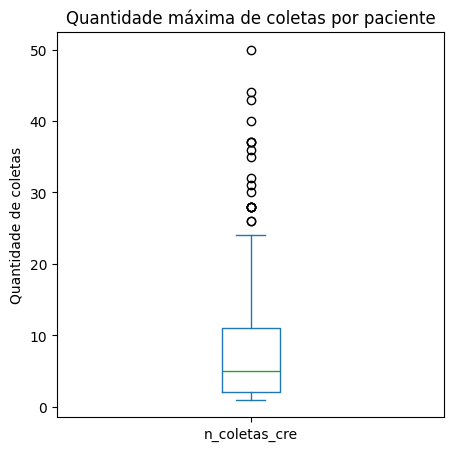

In [1175]:
# plot the boxplot of the max number of collections per uid_prontuario_internacao
plt.figure(figsize=(5, 5))
df_cre_enginnered.groupby('uid_prontuario_internacao')['n_coletas_cre'].max().plot(kind='box')
plt.xlabel('')
plt.ylabel('Quantidade de coletas')
plt.title('Quantidade máxima de coletas por paciente')
plt.show()

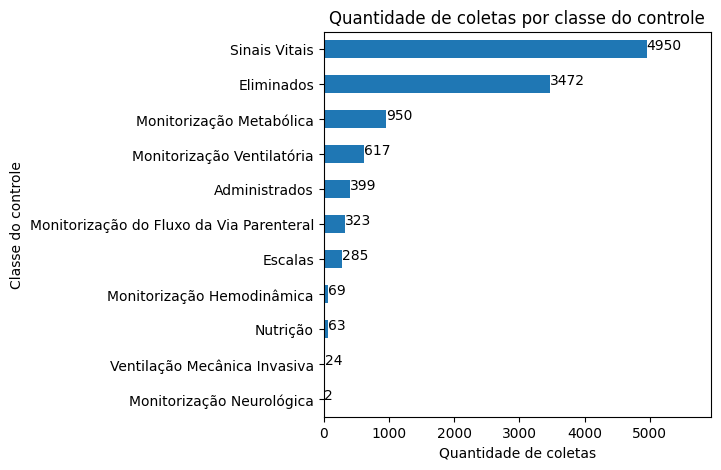

In [1176]:
plt.figure(figsize=(5, 5))
df_contr_enginnered['classe_controle'].value_counts().sort_values().plot(kind='barh')
for index, value in enumerate(df_contr_enginnered['classe_controle'].value_counts().sort_values()):
    plt.text(value, index, str(value))
plt.xlim(0, df_contr_enginnered['classe_controle'].value_counts().max()*1.2)
plt.xlabel('Quantidade de coletas')
plt.ylabel('Classe do controle')
plt.title('Quantidade de coletas por classe do controle')
plt.show()

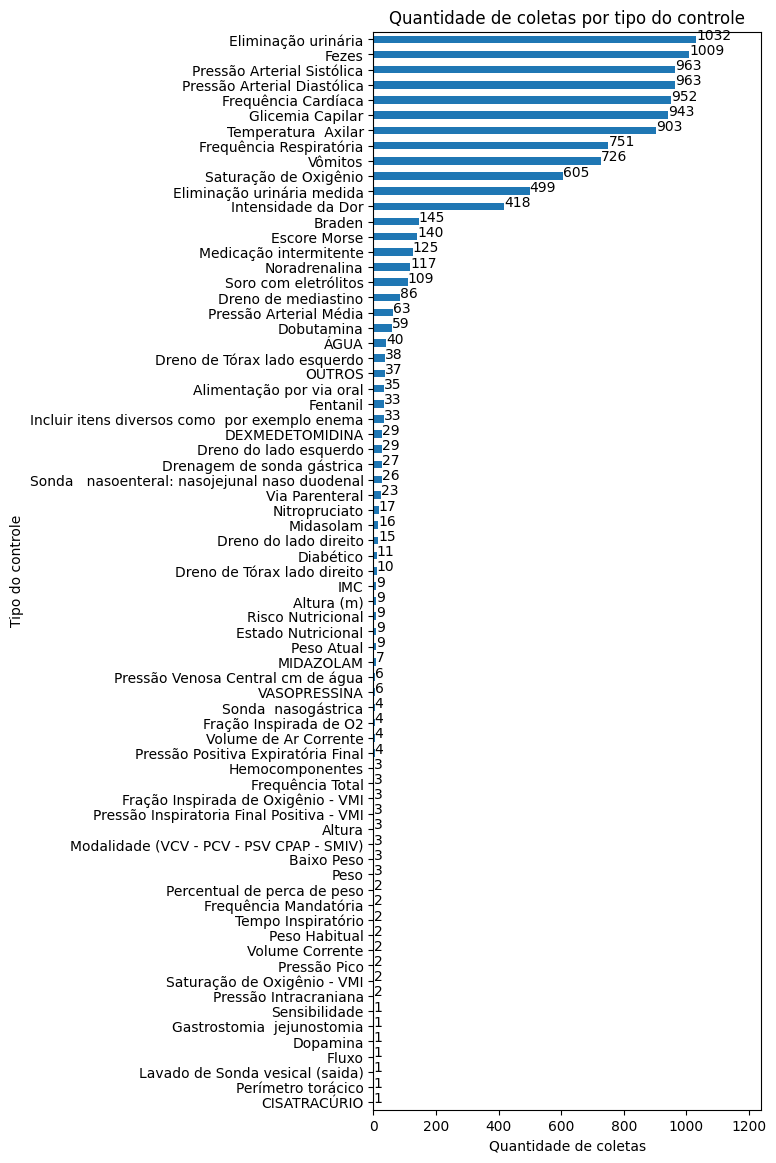

In [1177]:
plt.figure(figsize=(5, 14))
df_contr_enginnered['tipo_controle'].value_counts().sort_values().plot(kind='barh')
for index, value in enumerate(df_contr_enginnered['tipo_controle'].value_counts().sort_values()):
    plt.text(value, index, str(value))
plt.xlim(0, df_contr_enginnered['tipo_controle'].value_counts().max()*1.2)
plt.xlabel('Quantidade de coletas')
plt.ylabel('Tipo do controle')
plt.title('Quantidade de coletas por tipo do controle')
plt.show()

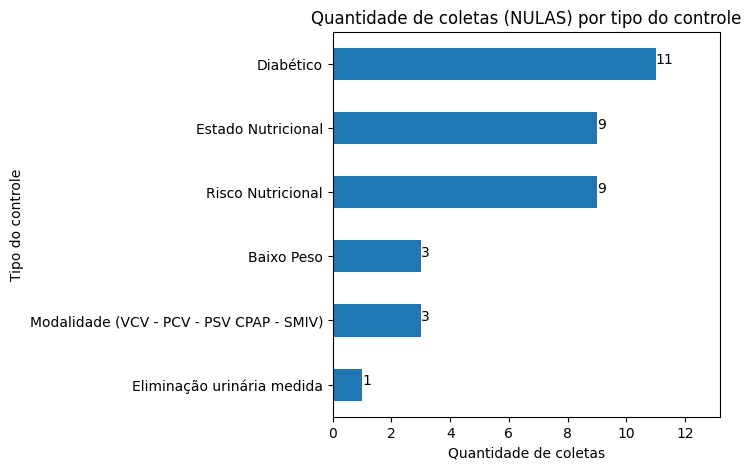

In [1178]:
df_temp = df_contr_enginnered[df_contr_enginnered['valor_controle'].isnull()]
plt.figure(figsize=(5, 5))
df_temp['tipo_controle'].value_counts().sort_values().plot(kind='barh')
# write the numbers on the bars
for index, value in enumerate(df_temp['tipo_controle'].value_counts().sort_values()):
    plt.text(value, index, str(value))
plt.xlim(0, df_temp['tipo_controle'].value_counts().max()*1.2)
plt.xlabel('Quantidade de coletas')
plt.ylabel('Tipo do controle')
plt.title('Quantidade de coletas (NULAS) por tipo do controle')
plt.show()

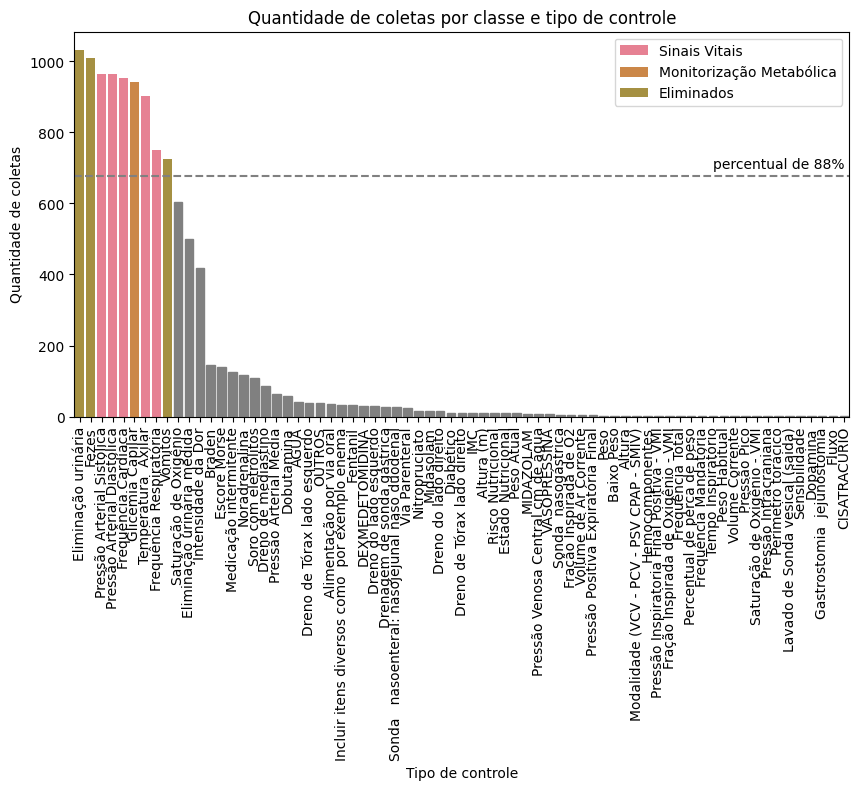

In [1179]:
#plot the number of occurrences of each type of control with hue of the class of control for each patient
plt.figure(figsize=(10, 5))
percentile = 0.88
# order the types of control by the number of occurrences
order = df_contr_enginnered['tipo_controle'].value_counts().index
sns.countplot(data=df_contr_enginnered, x='tipo_controle', hue='classe_controle', order=order)
# draw line of the 90% percentile of the number of occurrences and write "percentual de 90%"
plt.axhline(df_contr_enginnered['tipo_controle'].value_counts().quantile(percentile), color='gray', linestyle='--')
plt.text(58, df_contr_enginnered['tipo_controle'].value_counts().quantile(percentile)+20, f'percentual de {int(percentile*100)}%')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3])
# the bars bellow the 90% percentile line should be gray
for p in plt.gca().patches:
    if p.get_height() < df_contr_enginnered['tipo_controle'].value_counts().quantile(percentile):
        p.set_color('gray')
# keep in the legend only the classes of control that have at least one occurrence above the 90% percentile line
plt.xticks(rotation=90)
plt.xlabel('Tipo de controle')
plt.ylabel('Quantidade de coletas')
plt.title('Quantidade de coletas por classe e tipo de controle')
plt.show()

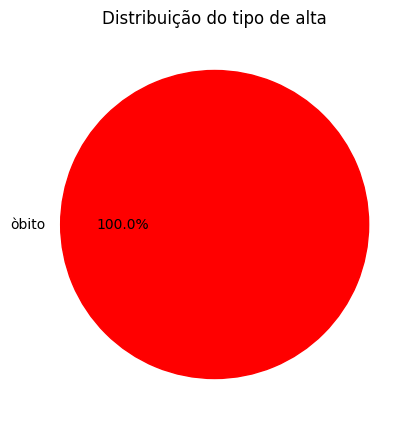

In [1180]:
# circle plot of the type of alta 
plt.figure(figsize=(5, 5))
df_contr_enginnered['alta'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# should be red if the patient had a type of alta "óbito"
plt.gca().patches[0].set_color('red')
plt.title('Distribuição do tipo de alta')
# remove the y label
plt.ylabel('')
plt.show()

**Todos** os pacientes listados nessa tabela tiveram como alta o obito ? Esse dado é valido ?

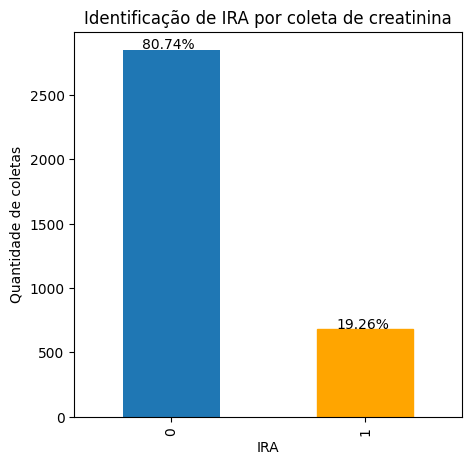

In [1181]:
plt.figure(figsize=(5, 5))
df_cre_enginnered['ira'].value_counts().plot(kind='bar')
# put the percent above the bars
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}%'.format((p.get_height()/df_cre_enginnered.shape[0])*100), (p.get_x()+0.1, p.get_height()+10))
# if x is 1 then the color of the bar should be orange
plt.gca().patches[1].set_color('orange')
plt.title('Identificação de IRA por coleta de creatinina')
plt.xlabel('IRA')
plt.ylabel('Quantidade de coletas')
plt.show()

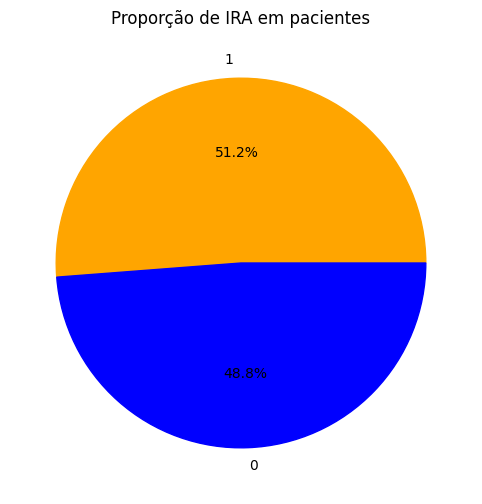

In [1182]:
# plot the pie chart if there is at least one occurrence of IRA per unique uid_prontuario_internacao
plt.figure(figsize=(10, 6))
df_cre_enginnered.groupby('uid_prontuario_internacao')['ira'].max().value_counts().plot(kind='pie', autopct='%1.1f%%')
# should be red if the patient had at least one occurrence of IRA
plt.gca().patches[0].set_color('orange')
plt.gca().patches[1].set_color('blue')
plt.title('Proporção de IRA em pacientes')
# remove the y label
plt.ylabel('')
plt.show()

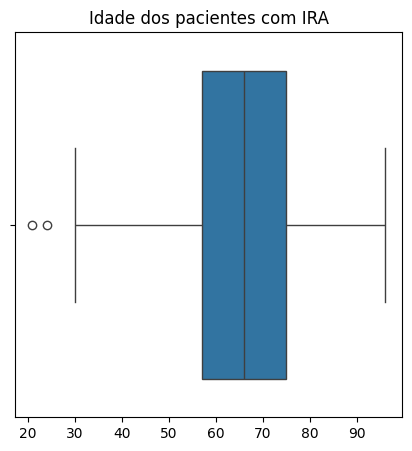

In [1183]:
# find the uid_prontuario_internacao and idade that have at least one occurrence of IRA or not
df_temp = df_cre_enginnered.groupby('uid_prontuario_internacao')['ira'].max().reset_index()
df_temp = df_temp.merge(df_cre_enginnered[['uid_prontuario_internacao', 'idade']].drop_duplicates(), on='uid_prontuario_internacao', how='left')
df_temp = df_temp[df_temp['ira'] == 1]
df_temp = df_temp.drop_duplicates()
df_temp = df_temp.sort_values(by='idade')
# plot the boxplot of the age of patients that have at least one occurrence of IRA
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_temp, x='idade')
plt.xlabel('')
plt.title('Idade dos pacientes com IRA')
plt.show()

# 5. Preparação do dataset

In [1184]:
# correlation matrix of the features
df_base_final_to_ml = df_base_final.copy()
df_base_final_to_ml.drop(columns=['uid_prontuario_internacao'], inplace=True)

In [1185]:
# identify features that have only one unique value
unique_value_columns = []
for column in df_base_final_to_ml.columns:
    if df_base_final_to_ml[column].nunique() == 1:
        unique_value_columns.append(column)
ic(unique_value_columns)
# drop the features that have only one unique value
df_base_final_to_ml.drop(columns=unique_value_columns, inplace=True)


ic| unique_value_columns: ['n_internacoes',
                           'variacao_contr_1_Eliminação urinária',
                           'variacao_contr_1_Fezes',
                           'variacao_contr_1_Vômitos',
                           'variacao_contr_2_Eliminação urinária',
                           'variacao_contr_2_Fezes',
                           'variacao_contr_2_Vômitos']


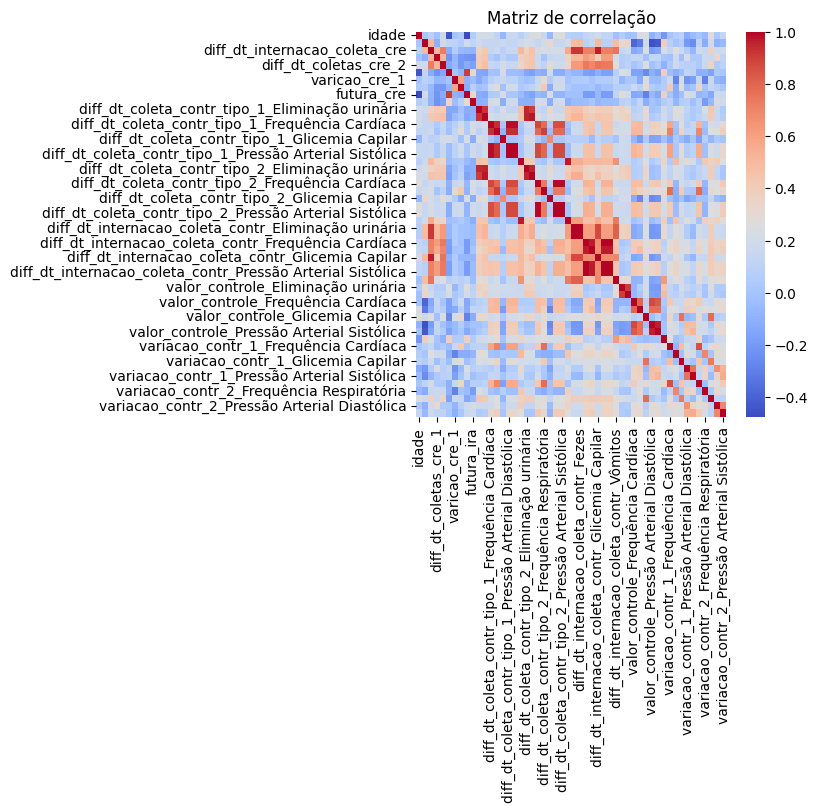

In [1204]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_base_final_to_ml.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

regression

In [1187]:
df_base_final_to_ml_reg = df_base_final_to_ml.drop(columns=['futura_ira'])

In [1188]:
# list feature with little correlation with the target ("future_cre")
little_correlation_columns = []
for column in df_base_final_to_ml_reg.columns:
    if abs(df_base_final_to_ml_reg[column].corr(df_base_final_to_ml_reg['futura_cre'])) < 0.1:
        little_correlation_columns.append(column)
# drop the features with little correlation with the target ("future_cre")
df_base_final_to_ml_reg.drop(columns=little_correlation_columns, inplace=True)

In [1189]:
df_base_final_to_ml_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count  Dtype          
---  ------                                                       --------------  -----          
 0   idade                                                        51 non-null     int64          
 1   n_coletas_cre                                                51 non-null     int64          
 2   diff_dt_coletas_cre_1                                        51 non-null     timedelta64[ns]
 3   diff_dt_coletas_cre_2                                        51 non-null     timedelta64[ns]
 4   valor_creatinina                                             51 non-null     float64        
 5   varicao_cre_2                                                51 non-null     float64        
 6   futura_cre                                                   51 non-null     float64        
 7   diff_dt_coleta_

In [1190]:
x_reg = df_base_final_to_ml_reg.drop(columns=['futura_cre'])
y_reg = df_base_final_to_ml_reg['futura_cre']

In [1191]:
timedelta_columns = [column for column in x_reg.columns if column.startswith('diff_')]

for column in timedelta_columns:
    x_reg[column] = x_reg[column].dt.total_seconds()

In [1192]:
scaler_reg = MinMaxScaler()

x_reg = scaler_reg.fit_transform(x_reg)

classification

In [1193]:
df_base_final_to_ml_classf = df_base_final_to_ml.drop(columns=['futura_cre'])

In [1194]:
little_correlation_columns = []
for column in df_base_final_to_ml_classf.columns:
    if abs(df_base_final_to_ml_classf[column].corr(df_base_final_to_ml_classf['futura_ira'])) < 0.1:
        little_correlation_columns.append(column)
df_base_final_to_ml_classf.drop(columns=little_correlation_columns, inplace=True)

In [1195]:
df_base_final_to_ml_classf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype          
---  ------                                                   --------------  -----          
 0   n_coletas_cre                                            51 non-null     int64          
 1   diff_dt_coletas_cre_1                                    51 non-null     timedelta64[ns]
 2   diff_dt_coletas_cre_2                                    51 non-null     timedelta64[ns]
 3   valor_creatinina                                         51 non-null     float64        
 4   futura_ira                                               51 non-null     int64          
 5   diff_dt_coleta_contr_tipo_1_Eliminação urinária          51 non-null     timedelta64[ns]
 6   diff_dt_coleta_contr_tipo_1_Frequência Cardíaca          51 non-null     timedelta64[ns]
 7   diff_dt_coleta_contr_tipo_1_Frequência Respiratória

In [1196]:
x_classf = df_base_final_to_ml_classf.drop(columns=['futura_ira'])
y_classf = df_base_final_to_ml_classf['futura_ira']

In [1197]:
timedelta_columns = [column for column in x_classf.columns if column.startswith('diff_')]

for column in timedelta_columns:
    x_classf[column] = x_classf[column].dt.total_seconds()

In [1198]:
scaler_classf = MinMaxScaler()

x_classf = scaler_classf.fit_transform(x_classf)

# 6. Modelagem

## 6.1. Separação de treino, validação e teste

In [1199]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.25, random_state=42)

In [1200]:
x_classf_train, x_classf_test, y_classf_train, y_classf_test = train_test_split(x_classf, y_classf, test_size=0.25, random_state=42)

## 6.2. Treinamento simplificado com LazyPredict

In [1201]:
reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None,
                    predictions=True)

models_reg, predictions_reg = reg.fit(x_reg_train, x_reg_test, y_reg_train, y_reg_test)

ic(models_reg)

100%|██████████| 42/42 [00:00<00:00, 64.96it/s]
ic| models_reg:                                Adjusted R-Squared    R-Squared     RMSE  \
                Model                                                                     
                Lars                                  10990690.09 -16486032.63 10310.16   
                RANSACRegressor                              2.72        -1.58     4.08   
                GaussianProcessRegressor                     2.37        -1.05     3.64   
                KernelRidge                                  2.04        -0.56     3.17   
                DummyRegressor                               1.71        -0.07     2.63   
                HistGradientBoostingRegressor                1.71        -0.07     2.63   
                LGBMRegressor                                1.71        -0.07     2.63   
                KNeighborsRegressor                          1.67        -0.01     2.55   
                TransformedTargetRegressor

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 3.305263
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

     2.39   
                ElasticNet                                   1.33         0.51     1.77   
                Lasso                                        1.31         0.54     1.73   
                LassoLars                                    1.31         0.54     1.73   
                TweedieRegressor                             1.29         0.57     1.67   
                GammaRegressor                               1.28         0.57     1.66   
                MLPRegressor                                 1.25         0.62     1.56   
                HuberRegressor                               1.20         0.70     1.39   
                LinearSVR                                    1.20         0.70     1.38   
                RidgeCV                                      1.14         0.78     1.18   
                LarsCV                                       1.14         0.79     1.17   
                LassoCV                                      1.14         0.7

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,10990690.09,-16486032.63,10310.16,0.01
RANSACRegressor,2.72,-1.58,4.08,0.03
GaussianProcessRegressor,2.37,-1.05,3.64,0.00
KernelRidge,2.04,-0.56,3.17,0.00
DummyRegressor,1.71,-0.07,2.63,0.00
HistGradientBoostingRegressor,1.71,-0.07,2.63,0.07
LGBMRegressor,1.71,-0.07,2.63,0.02
KNeighborsRegressor,1.67,-0.01,2.55,0.00
TransformedTargetRegressor,1.60,0.10,2.41,0.00


In [1202]:
classf = LazyClassifier(verbose=0,
                        ignore_warnings=False,
                        custom_metric=None)

models_classf, predictions_classf = classf.fit(x_classf_train, x_classf_test, y_classf_train, y_classf_test)

ic(models_classf)

 69%|██████▉   | 20/29 [00:00<00:00, 100.59it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████| 29/29 [00:00<00:00, 82.89it/s] 
ic| models_classf:                                Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
                   Model                                                                           
                   GaussianNB                         0.85               0.82     0.82      0.85   
                   DecisionTreeClassifier             0.69               0.78     0.78      0.70   
                   LogisticRegression                 0.77               0.76     0.76      0.78   
                   ExtraTreesClassifier               0.77               0.76     0.76      0.78   
                   BernoulliNB                        0.77               0.69     0.69      0.76   
                   XGBClassifier                      0.77               0.69     0.69      0.76   
                   KNeighborsClassifier               0.77               0.69     0.69      0.76   
                   Perceptron                      

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12, number of negative: 26
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.315789 -> initscore=-0.773190
[LightGBM] [Info] Start training from score -0.773190
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.85,0.82,0.82,0.85,0.01
DecisionTreeClassifier,0.69,0.78,0.78,0.70,0.01
LogisticRegression,0.77,0.76,0.76,0.78,0.01
ExtraTreesClassifier,0.77,0.76,0.76,0.78,0.04
BernoulliNB,0.77,0.69,0.69,0.76,0.01
XGBClassifier,0.77,0.69,0.69,0.76,0.04
KNeighborsClassifier,0.77,0.69,0.69,0.76,0.01
Perceptron,0.62,0.65,0.65,0.63,0.01
PassiveAggressiveClassifier,0.62,0.65,0.65,0.63,0.01


## 6.3. Treinamento com modelos de machine learning classicos

# 7. Avaliação da Performance de Modelos

# 8. Conclusão